In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import blackjack as bj
import numpy as np
from collections import defaultdict
import importlib

importlib.reload(bj)

<module 'blackjack' from 'C:\\Users\\TJ577DF\\PycharmProjects\\Blackjack\\blackjack.py'>

Conduct a blackjack simulation

In [ ]:
new_q_values = bj.mp_sim(8, 10000000, exp_rate=0.2, learn_rate=0.05)

In [93]:
res = defaultdict(lambda: (-2.0, None))
res_ace = defaultdict(lambda: (-2.0, None))

for (state, action), value in new_q_values.items():
    suc = value['success']
    substate = state[:-1]

    if state[2] == 0:
        if suc > res[substate][0]:
            res[substate] = (suc, action)
    else:
        if suc > res_ace[substate][0]:
            res_ace[substate] = (suc, action)


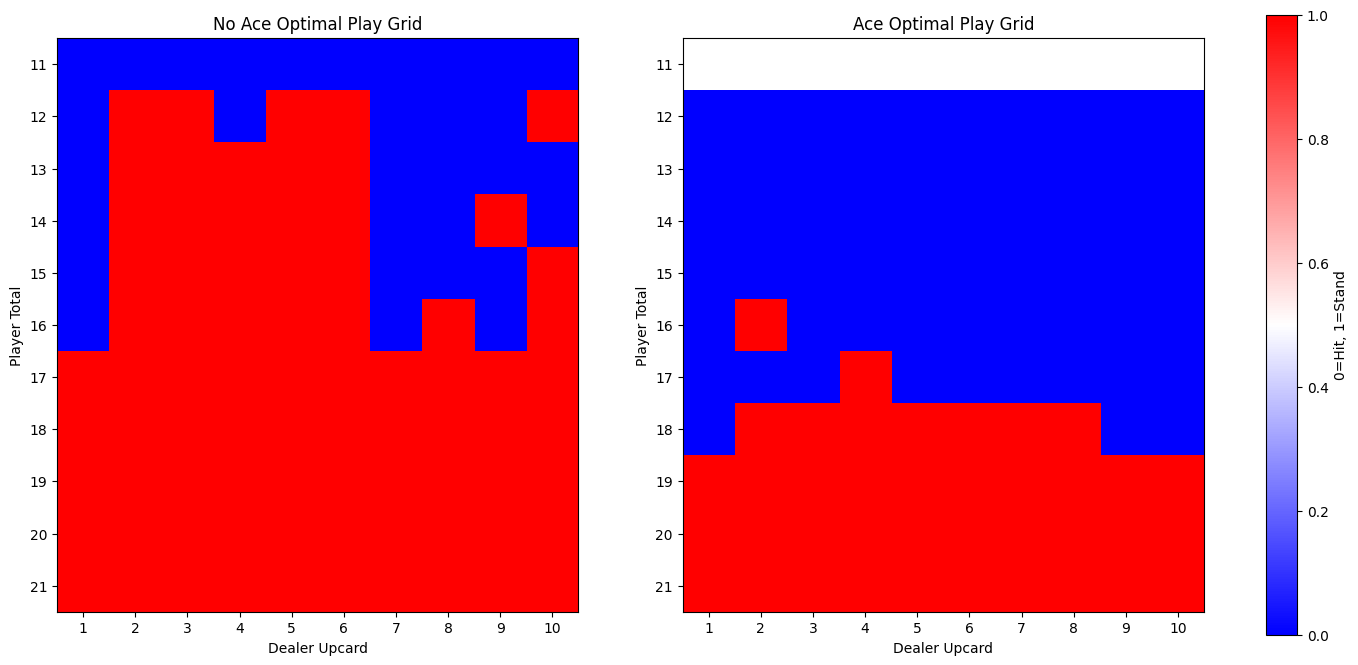

In [117]:
def hit_stand(ref, title, ax):
    dealer_vals = range(1, 11)
    player_vals = range(11, 22)

    grid = np.full((len(player_vals), len(dealer_vals)), np.nan)
    for [player, dealer], [val, action] in ref.items():
        if player >= 11:
            if player in player_vals and dealer in dealer_vals:
                grid[player - 11, dealer - 1] = 1 if action else 0

    im = ax.imshow(grid, cmap="bwr", origin="upper", vmin=0, vmax=1)
    ax.set_xticks(range(len(dealer_vals)), dealer_vals)
    ax.set_yticks(range(len(player_vals)), player_vals)
    ax.set_title(title)
    ax.set_xlabel("Dealer Upcard")
    ax.set_ylabel("Player Total")
    return im

fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs = axs.flatten()

im0 = hit_stand(res, "No Ace Optimal Play Grid", axs[0])
im1 = hit_stand(res_ace, "Ace Optimal Play Grid", axs[1])

plt.colorbar(im0, ax=axs, label="0=Hit, 1=Stand", fraction=0.025)
plt.show()
